<a href="https://colab.research.google.com/github/FranPomba/challenge_2_telecomX_br/blob/main/telecomx_br.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📌 Extracão

In [1]:
import pandas as pd

In [2]:
uri = "https://raw.githubusercontent.com/alura-cursos/challenge2-data-science/refs/heads/main/TelecomX_Data.json"

In [3]:
dados = pd.read_json(uri)

In [4]:
dados.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


#🔧 Transformação

In [5]:
colunas = list(dados.columns[2:])

In [6]:
colunas

['customer', 'phone', 'internet', 'account']

Normalizando as colunas

In [7]:
dfs = []

for coluna in colunas:
  df = pd.json_normalize(dados[coluna])
  df.columns = [col for col in df.columns]
  dfs.append(df)

dados_final = pd.concat([dados.drop(columns=colunas)] + dfs, axis=1)

In [8]:
dados_final.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [9]:
dados_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


Tratando as Inconsistências

In [10]:
dados_final.columns = dados_final.columns.str.replace(".", "_")

In [11]:
dados_final.isnull().values.any()

np.False_

In [12]:
dados_final['Charges_Total'] = pd.to_numeric(dados_final['Charges_Total'], errors="coerce")

In [13]:
dados_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [14]:
dados_final.Churn.unique()

array(['No', 'Yes', ''], dtype=object)

Eliminando os dados inconsistentes da coluna Churn

In [15]:
dados_final = dados_final.loc[dados_final["Churn"] != ""]

In [16]:
dados_final['Charges_Total'] = dados_final["Charges_Total"].fillna(0)

In [17]:
dados_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   Churn             7043 non-null   object 
 2   gender            7043 non-null   object 
 3   SeniorCitizen     7043 non-null   int64  
 4   Partner           7043 non-null   object 
 5   Dependents        7043 non-null   object 
 6   tenure            7043 non-null   int64  
 7   PhoneService      7043 non-null   object 
 8   MultipleLines     7043 non-null   object 
 9   InternetService   7043 non-null   object 
 10  OnlineSecurity    7043 non-null   object 
 11  OnlineBackup      7043 non-null   object 
 12  DeviceProtection  7043 non-null   object 
 13  TechSupport       7043 non-null   object 
 14  StreamingTV       7043 non-null   object 
 15  StreamingMovies   7043 non-null   object 
 16  Contract          7043 non-null   object 
 17  

Criando a coluna contas diárias

In [18]:
dados_final["Contas_Diarias"] = dados_final["Charges_Monthly"] / 30

In [19]:
dados_final.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges_Monthly,Charges_Total,Contas_Diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.796667


Padronização e Transformação de Dados

In [ ]:
dados_final["gender"].replace({"Female": "Femenino", "Male": "Masculino"}, inplace=True)

In [20]:
dados_final["Churn"].replace({"Yes": 1, "No":0}, inplace=True)

C:\Users\Agostinho Pomba\AppData\Local\Temp\ipykernel_8340\2522239149.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dados_final["Churn"].replace({"Yes": 1, "No":0}, inplace=True)
C:\Users\Agostinho Pomba\AppData\Local\Temp\ipykernel_8340\2522239149.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', Tr

In [21]:
dados_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   Churn             7043 non-null   int64  
 2   gender            7043 non-null   object 
 3   SeniorCitizen     7043 non-null   int64  
 4   Partner           7043 non-null   object 
 5   Dependents        7043 non-null   object 
 6   tenure            7043 non-null   int64  
 7   PhoneService      7043 non-null   object 
 8   MultipleLines     7043 non-null   object 
 9   InternetService   7043 non-null   object 
 10  OnlineSecurity    7043 non-null   object 
 11  OnlineBackup      7043 non-null   object 
 12  DeviceProtection  7043 non-null   object 
 13  TechSupport       7043 non-null   object 
 14  StreamingTV       7043 non-null   object 
 15  StreamingMovies   7043 non-null   object 
 16  Contract          7043 non-null   object 
 17  

#📊 Carga e análise

# Analise descritiva

In [22]:
dados_final.describe()

,Churn,SeniorCitizen,tenure,Charges_Monthly,Charges_Total,Contas_Diarias
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.265370,0.162147,32.371149,64.761692,2279.734304,2.158723
std,0.441561,0.368612,24.559481,30.090047,2266.794470,1.003002
min,0.000000,0.000000,0.000000,18.250000,0.000000,0.608333
25%,0.000000,0.000000,9.000000,35.500000,398.550000,1.183333
50%,0.000000,0.000000,29.000000,70.350000,1394.550000,2.345000
75%,1.000000,0.000000,55.000000,89.850000,3786.600000,2.995000
max,1.000000,1.000000,72.000000,118.750000,8684.800000,3.958333


# Distribuição da Evasão

In [23]:
import matplotlib.pyplot as plt

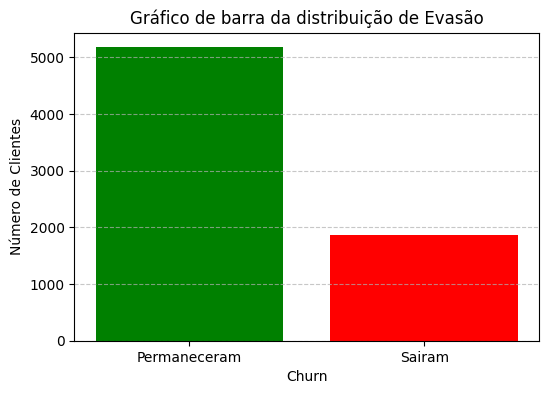

In [24]:
plt.figure(figsize=(6, 4))
plt.bar(["Permaneceram", "Sairam"], dados_final["Churn"].value_counts().values, color=["green", "red"])
plt.title("Gráfico de barra da distribuição de Evasão")
plt.xlabel("Churn")
plt.ylabel("Número de Clientes")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

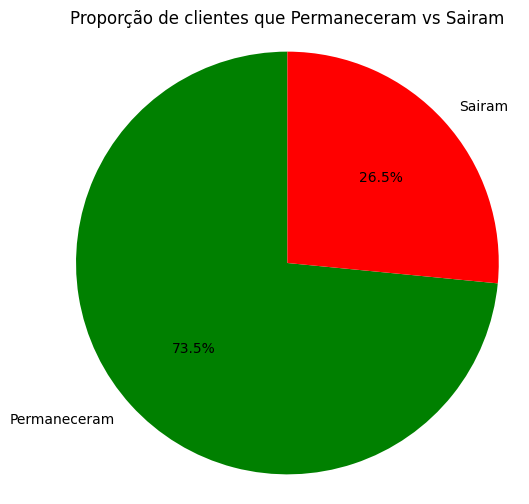

In [25]:
plt.figure(figsize=(6,6))
plt.pie(dados_final["Churn"].value_counts().values, labels=["Permaneceram", "Sairam"], autopct='%1.1f%%', startangle=90, colors=["green", "red"])
plt.title("Proporção de clientes que Permaneceram vs Sairam")
plt.axis("equal")
plt.show()

# Contagem de Evasão por Variáveis Categóricas

### contagem de evasão por genero

In [27]:
contagem_churn_genero = dados_final.groupby("gender")["Churn"]

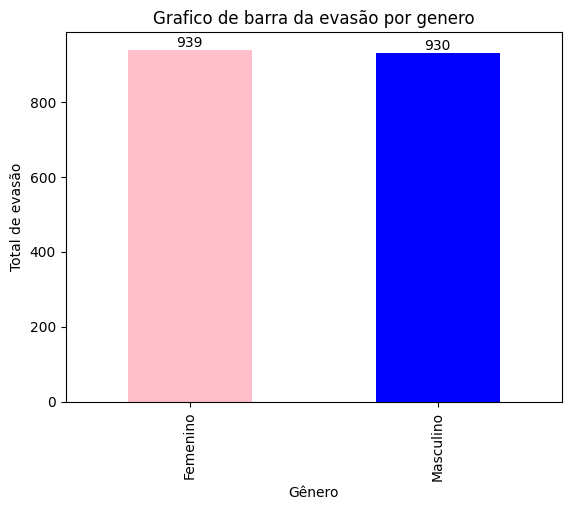

In [28]:
contagem_churn_genero.sum().plot(kind="bar", color=["pink", "blue"])
plt.title("Grafico de barra da evasão por genero")
plt.ylabel("Total de evasão")
plt.xlabel("Gênero")
for i, v in enumerate(contagem_churn_genero.sum()):
    plt.text(i, v + 0.5, str(int(v)), ha="center", va="bottom", fontsize=10)

plt.show()

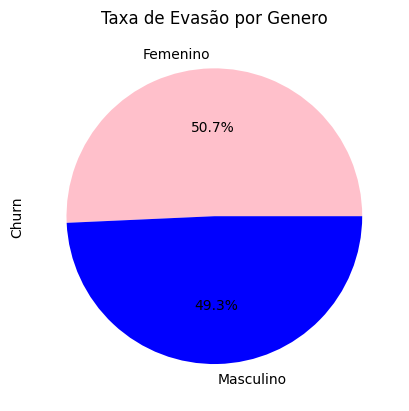

In [29]:
contagem_churn_genero.mean().plot(kind="pie", autopct='%1.1f%%', colors=["pink", "blue"])
plt.title("Taxa de Evasão por Genero")
plt.show()

### contagem da evasão por tipo de contrato

In [30]:
df_churn_contract = pd.crosstab(dados_final["Contract"], dados_final["Churn"], normalize="index")

In [70]:
df_churn_contract

Churn,0,1
Contract,,
Month-to-month,0.572903,0.427097
One year,0.887305,0.112695
Two year,0.971681,0.028319


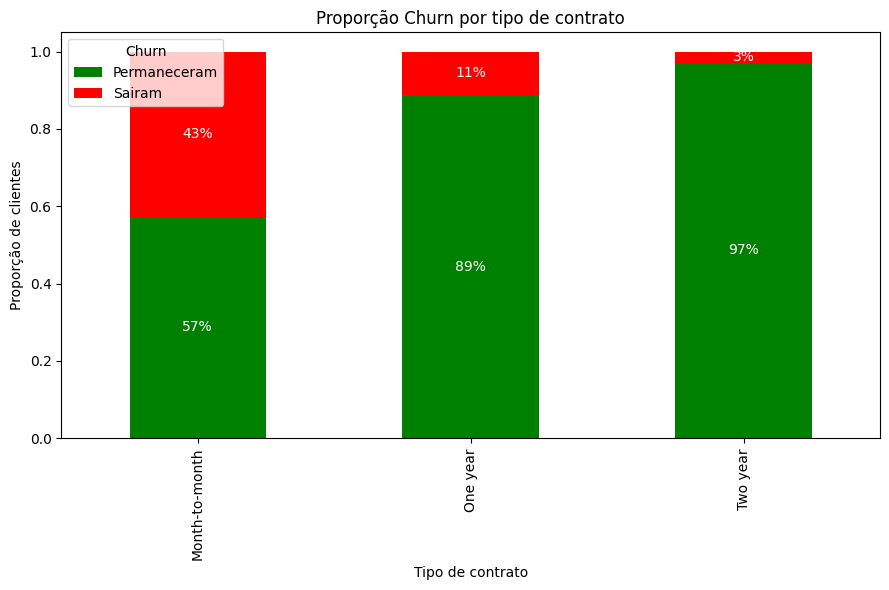

In [31]:
df_churn_contract.plot(kind="bar", stacked=True, color=["green", "red"], figsize=(9, 6))
plt.title("Proporção Churn por tipo de contrato")
plt.xlabel("Tipo de contrato")
plt.ylabel("Proporção de clientes")
plt.legend(["Permaneceram", "Sairam"], title="Churn")
for i, contract in enumerate(df_churn_contract.index):
    sairam = df_churn_contract.loc[contract, 0]
    permaneceram = df_churn_contract.loc[contract, 1]
    plt.text(i, sairam / 2, f"{sairam:.0%}", ha="center", va="center", color="white")
    plt.text(i, sairam + (permaneceram / 2), f'{permaneceram:.0%}', ha="center", va="center", color="white")

plt.tight_layout()
plt.show()

In [32]:
import seaborn as sns

### Contagem da evasão por metodo de pagamento

In [33]:
sns.set_theme(style="whitegrid")

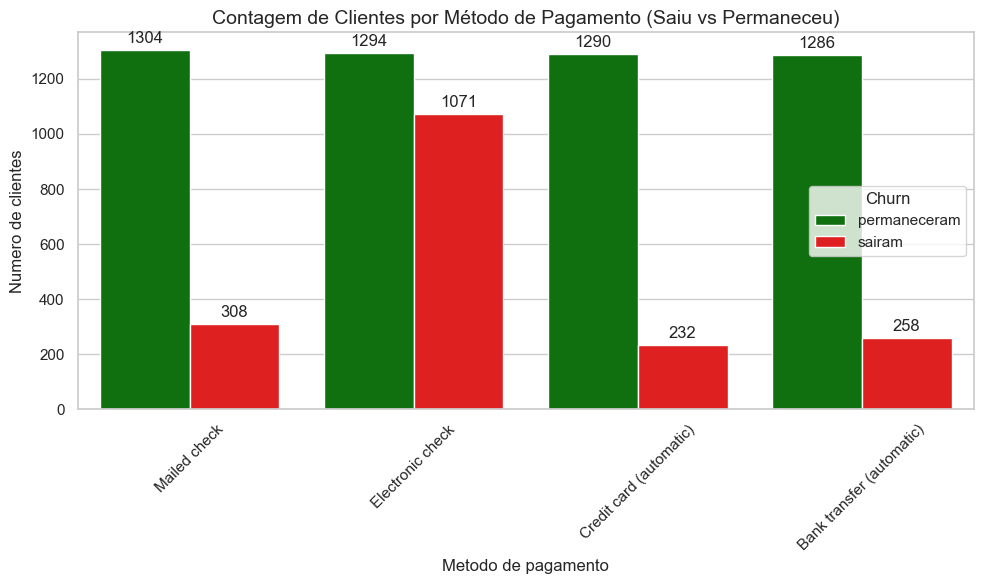

In [34]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=dados_final, x="PaymentMethod", hue="Churn", palette={0: "green", 1: "red"})
for c in ax.containers:
    ax.bar_label(c, label_type='edge', padding=3)
plt.title("Contagem de Clientes por Método de Pagamento (Saiu vs Permaneceu)", fontsize=14)
plt.legend(["permaneceram", "sairam"], title="Churn")
plt.ylabel("Numero de clientes")
plt.xlabel("Metodo de pagamento")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Contagem da evasão por clientes com idade igual ou acima de 65 anos

In [35]:
df_senior_citizen_churn = dados_final.groupby("SeniorCitizen")["Churn"].mean()

In [36]:
df_senior_citizen_churn.index = ["Não Idoso", "Idoso"]

In [37]:
df_senior_citizen_churn

Não Idoso    0.236062
Idoso        0.416813
Name: Churn, dtype: float64

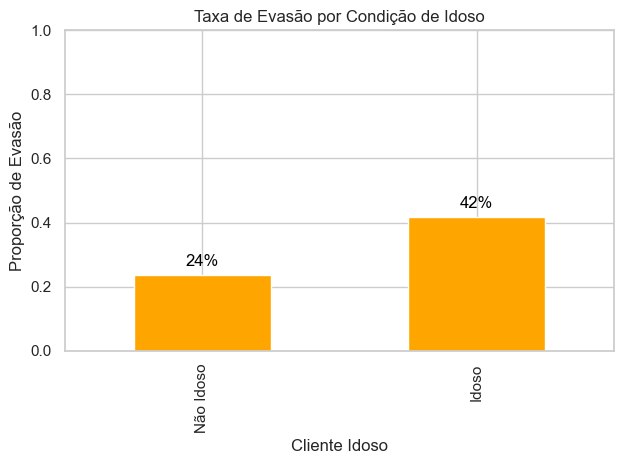

In [38]:
df_senior_citizen_churn.plot(kind="bar",  color="orange")
plt.title("Taxa de Evasão por Condição de Idoso")
plt.xlabel("Cliente Idoso")
plt.ylabel("Proporção de Evasão")
plt.ylim(0, 1)
for i, valor in enumerate(df_senior_citizen_churn):
    plt.text(i, valor + 0.02, f"{valor:.0%}", ha="center", va="bottom", color="black")
plt.tight_layout()
plt.show()

### Contagem de evasão com relação a Idade (SeniorCitizen), Dependentes e o Tipo de contrato

In [45]:
df_churn_grupo = dados_final.groupby(["SeniorCitizen", "Dependents", "Contract"])["Churn"].mean().reset_index()
df_churn_grupo["SeniorCitizen"].replace({0:"Não Idoso",1: "Idoso"}, inplace=True)

C:\Users\Agostinho Pomba\AppData\Local\Temp\ipykernel_8340\1018407557.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_churn_grupo["SeniorCitizen"].replace({0:"Não Idoso",1: "Idoso"}, inplace=True)


In [46]:
df_churn_grupo.columns = ["SeniorCitizen", "Dependents", "Contract", "Taxa de Evasão"]

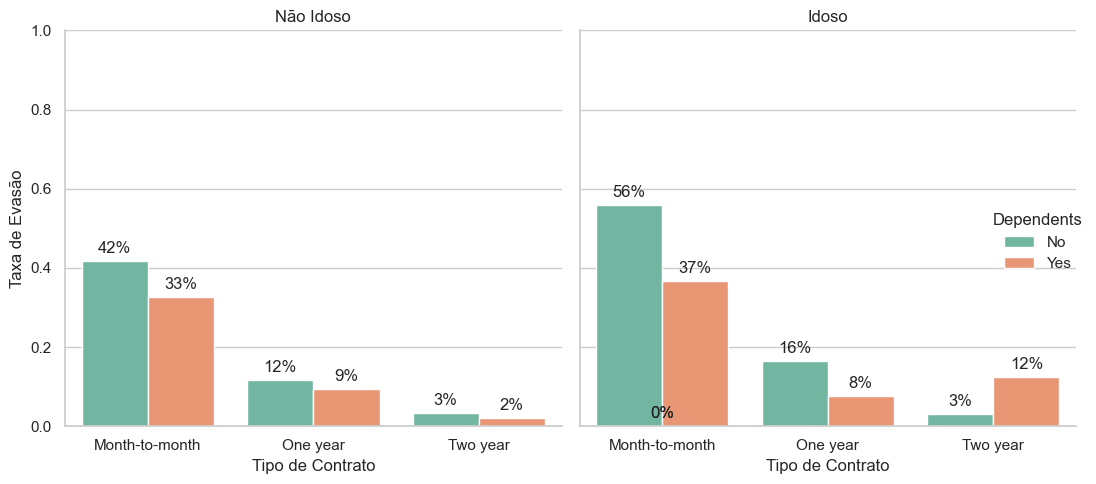

In [ ]:
g = sns.catplot(
    data=df_churn_grupo,
    kind="bar",
    x="Contract",
    y="Taxa de Evasão",
    hue="Dependents",
    col="SeniorCitizen",
    palette="Set2",
    height=5,
    aspect=1
)
g.set_titles("{col_name}")
g.set_axis_labels("Tipo de Contrato", "Taxa de Evasão")
g.set(ylim=(0, 1))


for ax in g.axes.flatten():
    for p in ax.patches:
        height = p.get_height()
        ax.text(
            p.get_x() + p.get_width() / 2,
            height + 0.02,
            f"{height:.0%}",
            ha="center"
        )

plt.tight_layout()
plt.show()


## Contagem de Evasão por Variáveis Numéricas

### Contagem da evasão (Churn) por Total_Charges (Total de gastos)

C:\Users\Agostinho Pomba\AppData\Local\Temp\ipykernel_8340\3506914787.py:25: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=dados_final_plot[dados_final_plot["Churn"] == "Saiu"]["Charges_Total"], label="Saiu", shade=True, ax=axs[1, 1])
C:\Users\Agostinho Pomba\AppData\Local\Temp\ipykernel_8340\3506914787.py:26: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=dados_final_plot[dados_final_plot["Churn"] == "Permaneceu"]["Charges_Total"], label="Permaneceu", shade=True, ax=axs[1, 1])


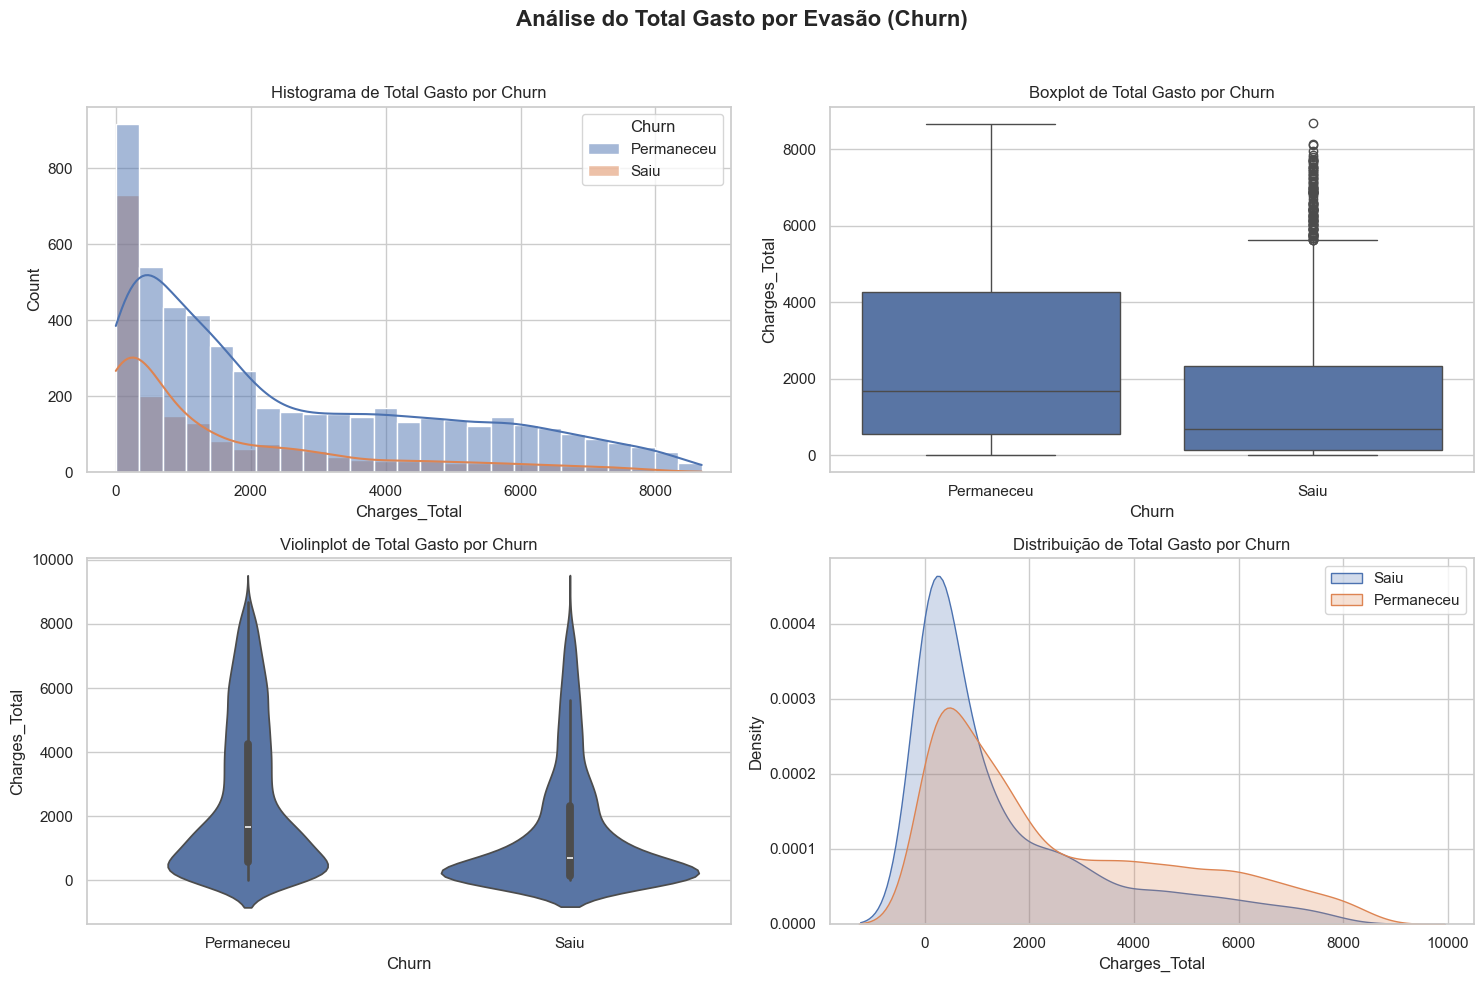

In [ ]:

dados_final_plot = dados_final.copy()
dados_final_plot["Churn"] = dados_final_plot["Churn"].map({0: "Permaneceu", 1: "Saiu"})

fig, axs = plt.subplots(2, 2, figsize=(15, 10))

fig.suptitle("Análise do Total Gasto por Evasão (Churn)", fontsize=16, fontweight='bold')

# Histograma
sns.histplot(data=dados_final_plot, x="Charges_Total", hue="Churn", kde=True, ax=axs[0, 0])
axs[0, 0].set_title("Histograma de Total Gasto por Churn")

# Boxplot
sns.boxplot(data=dados_final_plot, x="Churn", y="Charges_Total", ax=axs[0, 1])
axs[0, 1].set_title("Boxplot de Total Gasto por Churn")

# Violinplot
sns.violinplot(data=dados_final_plot, x="Churn", y="Charges_Total", ax=axs[1, 0])
axs[1, 0].set_title("Violinplot de Total Gasto por Churn")

# KDE Plot
sns.kdeplot(data=dados_final_plot[dados_final_plot["Churn"] == "Saiu"]["Charges_Total"], label="Saiu", shade=True, ax=axs[1, 1])
sns.kdeplot(data=dados_final_plot[dados_final_plot["Churn"] == "Permaneceu"]["Charges_Total"], label="Permaneceu", shade=True, ax=axs[1, 1])
axs[1, 1].set_title("Distribuição de Total Gasto por Churn")
axs[1, 1].legend()


plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


### Contagem da evasão (Churn) por Tenure (Tempo de contrato)

C:\Users\Agostinho Pomba\AppData\Local\Temp\ipykernel_8340\4060139155.py:17: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=dados_final_plot[dados_final_plot["Churn"] == "Saiu"]["tenure"], label="Saiu", shade=True, ax=axs[1, 1])
C:\Users\Agostinho Pomba\AppData\Local\Temp\ipykernel_8340\4060139155.py:18: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=dados_final_plot[dados_final_plot["Churn"] == "Permaneceu"]["tenure"], label="Permaneceu", shade=True, ax=axs[1, 1])


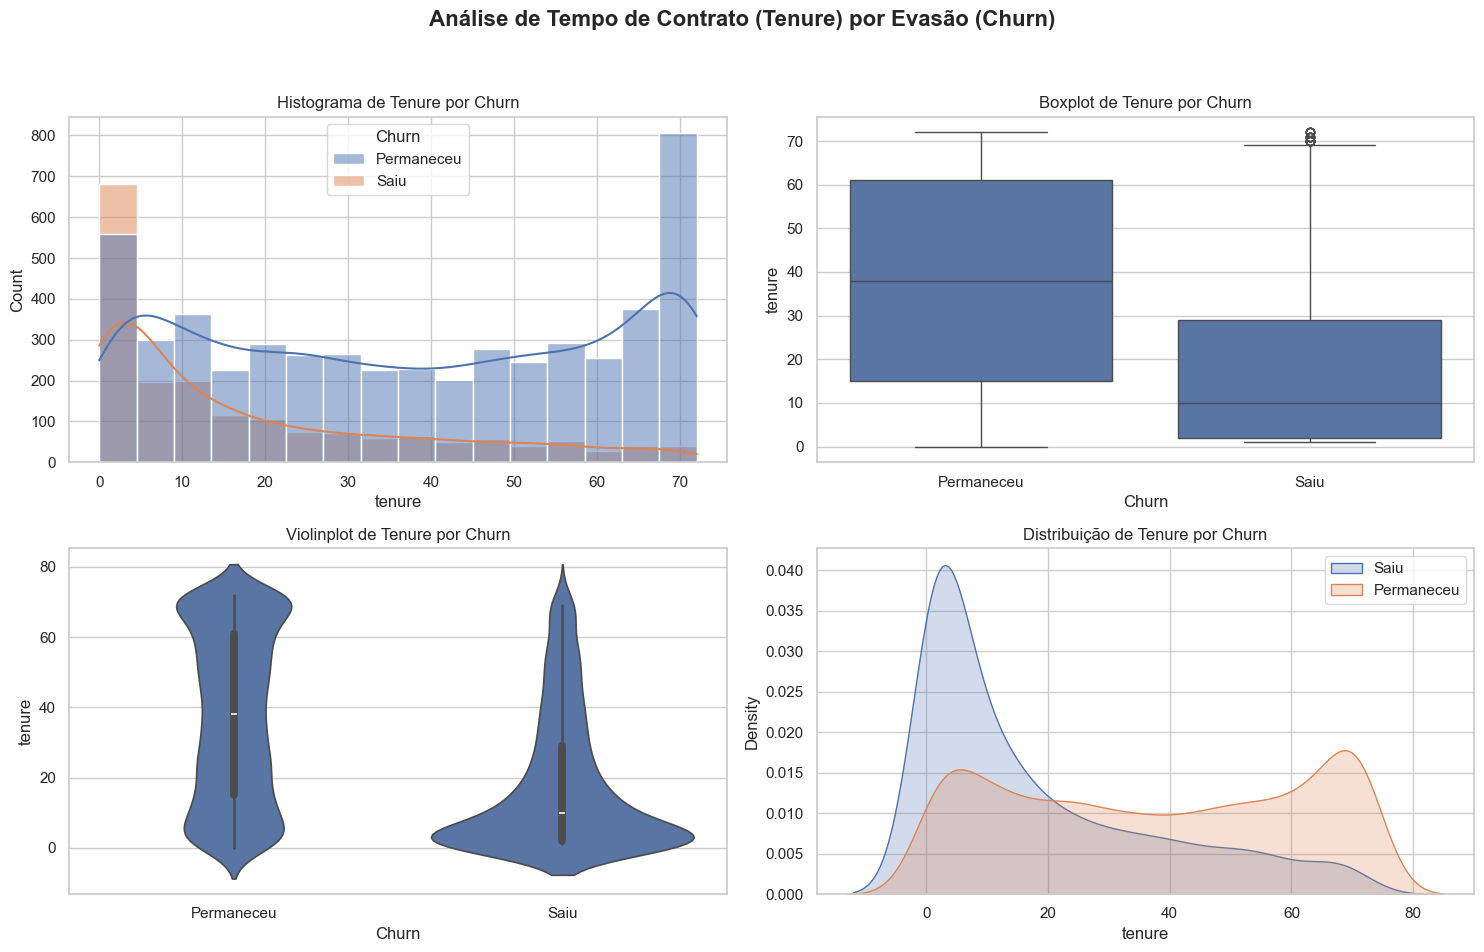

In [ ]:

fig, axs = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle("Análise de Tempo de Contrato (Tenure) por Evasão (Churn)", fontsize=16, fontweight='bold')

# Histograma + KDE
sns.histplot(data=dados_final_plot, x="tenure", hue="Churn", kde=True, ax=axs[0, 0])
axs[0, 0].set_title("Histograma de Tenure por Churn")

# Boxplot
sns.boxplot(data=dados_final_plot, x="Churn", y="tenure", ax=axs[0, 1])
axs[0, 1].set_title("Boxplot de Tenure por Churn")

# Violinplot
sns.violinplot(data=dados_final_plot, x="Churn", y="tenure", ax=axs[1, 0])
axs[1, 0].set_title("Violinplot de Tenure por Churn")

# KDE 
sns.kdeplot(data=dados_final_plot[dados_final_plot["Churn"] == "Saiu"]["tenure"], label="Saiu", shade=True, ax=axs[1, 1])
sns.kdeplot(data=dados_final_plot[dados_final_plot["Churn"] == "Permaneceu"]["tenure"], label="Permaneceu", shade=True, ax=axs[1, 1])
axs[1, 1].set_title("Distribuição de Tenure por Churn")
axs[1, 1].legend()

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) 
plt.show()


### Contagem da evasão (Churn) por Tenure (Tempo de contrato) e Charges_Total(Total de gastos)

C:\Users\Agostinho Pomba\AppData\Local\Temp\ipykernel_8340\2958204162.py:33: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


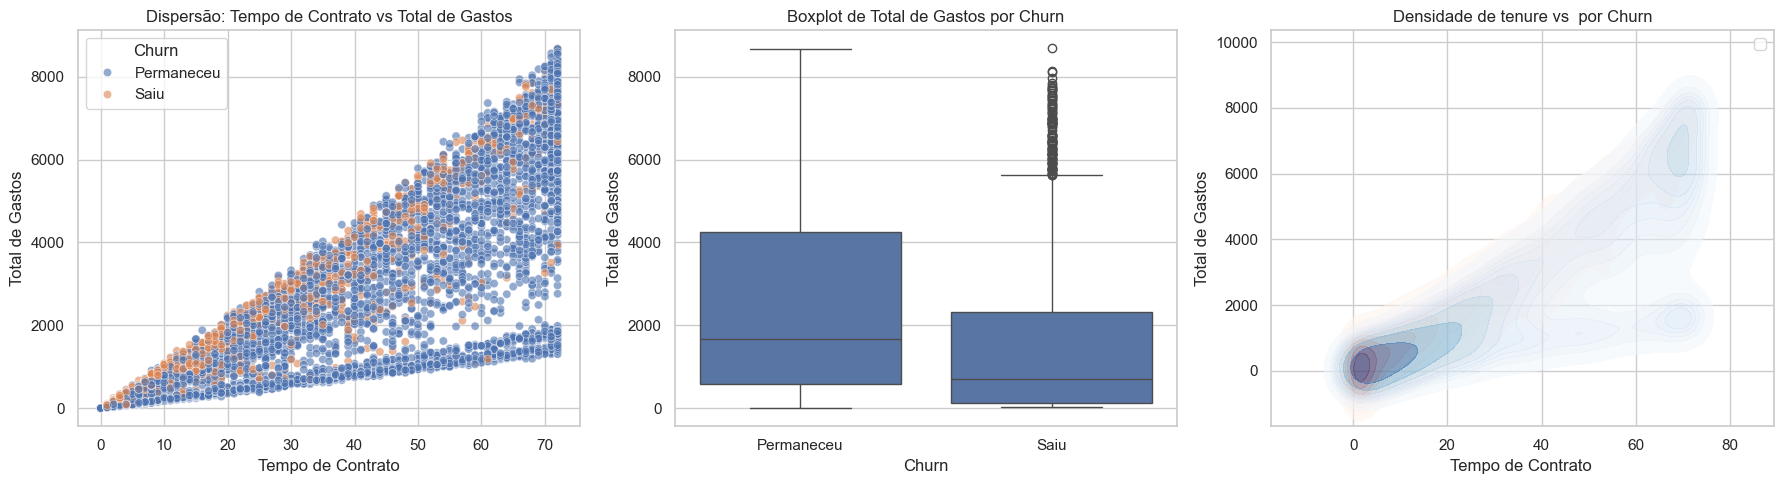

In [ ]:

sns.set_theme(style="whitegrid")
plt.figure(figsize=(18, 5))

# scatterplot
plt.subplot(1, 3, 1)
sns.scatterplot(data=dados_final_plot, x="tenure", y="Charges_Total", hue="Churn", alpha=0.6)
plt.title("Dispersão: Tempo de Contrato vs Total de Gastos")
plt.xlabel("Tempo de Contrato")
plt.ylabel("Total de Gastos")

# Boxplot 
plt.subplot (1, 3, 2)
sns.boxplot(data=dados_final_plot, x="Churn", y='Charges_Total')
plt.title("Boxplot de Total de Gastos por Churn")
plt.xlabel("Churn")
plt.ylabel("Total de Gastos")

# KDEplot 
plt.subplot(1, 3, 3)
sns.kdeplot(
    data=dados_final_plot[dados_final_plot["Churn"] == "Saiu"],
    x="tenure", y="Charges_Total",
    cmap="Reds", fill=True, thresh=0.05, label="Saiu", alpha=0.5
)
sns.kdeplot(
    data=dados_final_plot[dados_final_plot['Churn'] == 'Permaneceu'],
    x="tenure", y="Charges_Total",
    cmap="Blues", fill=True, thresh=0.05, label="Permaneceu", alpha=0.5
)
plt.title("Densidade de tenure vs  por Churn")
plt.xlabel("Tempo de Contrato ")
plt.ylabel("Total de Gastos")
plt.legend()

plt.tight_layout()
plt.show()


# 📄Relatorio Final

## Introdução

Este relatório tem como objetivo analisar o problema de evasão de clientes (Churn) em uma empresa de serviços de telecomunicações. A evasão representa um grande desafio, pois impacta diretamente a receita e a sustentabilidade do negócio. Através da análise dos dados fornecidos, buscamos identificar padrões de comportamento que levem à saída dos clientes, entender o perfil de quem permanece e propor ações para reduzir o churn.

## Limpeza e Tratamento de Dados

Os dados foram importados de um arquivo `.json` e passaram pelos seguintes tratamentos:

- Conversão de colunas numéricas que estavam como `object` (ex: `TotalCharges`) para tipo `float`.
- Remoção de valores ausentes (NAs).
- Normalização dos valores da variável `Churn` para facilitar a leitura: "Yes" virou 1, "No" virou 0.
- Normalização da variaável `gender` para facilitar a leitura: "Male" virou "Masculino", "Famale" virou "Femenino"
- Verificação de tipos de dados e distribuição de valores.
- Criação da coluna `Contas_Diarias` a partir dos gastos mensais coluna `Charges_Monthly` / 30
## Análise Exploratória de Dados
### 1 - Análise descritiva

- Foi realizada análise descritiva completa dos dados, incluindo cálculo de medidas de tendência central (média, mediana, moda) e dispersão (desvio padrão) para todas as variáveis numéricas.

### 2 - Distribuição do Churn
- Utilizamos gráfico de barras para visualizar  a distribuição da evasão 

![Gráfico de distribuição](grafico%20dist%20churn.png)

- Utilizamos o gráfico de pizza para visualizar a proporção de clientes que permaneceram e os que saíram 

![Gráfico de Pizza](proporcao%20churn.png)


### 3 - Contagem de Evasão por Variáveis Categóricas
- Gráfico de barra para visualizar como o `Churn` se distribui por genero
![evasao genero](evasao%20genero.png) 

- Taxa da evasão por genero

![taxa evasao genero](taxa%20evasao%20genero.png)

- Gráfico de barras empilhadas para visualizar a proporção da evasão com relação ao tipo de contrato

![proporção churn tipo de contrato](proporcao%20tipo%20contrato.png)

- Contagem da evasão com relação ao metodo de pagamento 

![evasao metodo de pagamento](evasao%20metodo%20pagamentp.png)

- Gráfico para visualizar a taxa de evasão por grupo de idoso e não idoso

![taxa evasao idoso](taxa%20evasao%20idoso.png)

- Gráfico que mostra como a evasão  varia de acordo com: Idade, Dependentes, Tipo de contrato

![evasao idoso](evasao%20idoso%20dependents.png)


### 4 - Contagem de Evasão por Variáveis Numéricas

Nesta etapa o foco era entender como o total de gastos e o tempo de contrato estão distribuídas entre os dois grupos (quem saiu e quem permaneceu).

- Gráfico que mostra a relação entre `Charges_Total`(Total de gastos) e o `Churn`(Evasão)

![total gastos evasao](total%20gasto%20por%20evasao.png)

- Gráfico que mostra a relação entre o `tenure`(tempo de contrato) e o `Churn`(evasão)

![tempo de contrato evasao](tempo%20contrato%20por%20evasao.png)

- Gráfico que mostra se há relação entre o `tenure`(tempo de contrato), `Charges_Total`(Total de gastos) e o `Churn`(Evasão)

![tempo de contrato total de gastos](tempo%20de%20contrato%20total%20gastos.png)


## Conclusões e Insights

Anilisou-se dados de 7043 clientes ela revelou os seguintes pontos importantes:

- Aproximadamente 26.5% dos clientes sairam oque representa uma média bastante alta;
- Aproximadamente 16% dos clientes são idosos, oque significa que a maioria dos clientes tem a idade menor que 65 anos;
- A mediana do tempo de contrato é de 29 meses oque pode indicar que metade dos clientes permanecem menos de 2 anos e meio na empresa;
- O cliente gasta em media diariamente R$ 2,16 por dia;
- Os gastos mensais dos clientes variam de R$ 35 e R$ 90  com uma média de gastos mensais de R$ 64;
- Os gastos total  variam de R$ 0 a R$ 8684 oque pode estar relacinado com o tempo de contarato;
- A distribuição da evasão entre os gêneros foi bastante equilibrada:
    **Masculino**: 49,3% dos clientes que cancelaram o serviço.
    **Feminino**: 50,7% dos clientes que cancelaram o serviço.
- Clientes com contrato mensal apresentam a maior taxa de evasão.
- Clientes idosos apresentam taxas de evasão significativamente mais altas em contratos mensais 
- Clientes sem dependentes  apresentam maior taxa de evasão
- Idosos sem dependentes com contratos mensais representam o grupo de maior risco (56% de evasão)
- Clientes com contratos de longo prazo são os mais estáveis, independentemente da idade
- Clientes com contrato de 1 ou 2 anos tendem a permanecer por mais tempo na empresa, com taxas de churn drasticamente menores.
- Clientes que **permanecem** tendem a ter **maior tempo de contrato** e **maiores gastos totais**.
- A maior concentração de **churn** ocorre nos **primeiros meses de contrato**, especialmente com `tenure` abaixo de 12 meses.
- Clientes que saem costumam ter **gastos menores**, o que indica que eles não permanecem tempo suficiente para gerar receita significativa.
- Os gráficos mostraram uma divisão clara entre os perfis de clientes que permanecem e os que saem, sugerindo que o churn pode ser previsto com base em poucos indicadores (tempo e gasto).


## Conclusões e Insights Estratégicos

A análise de **7.043 clientes** revelou um cenário desafiador para a empresa de telecomunicações. Com uma **taxa de evasão de 26,5%**, a empresa enfrenta um problema significativo que demanda ação imediata, considerando que esta taxa está acima da média do setor de telecomunicações.

- Aproximadamente **84% são não-idosos** (menor que 65 anos), indicando uma base predominantemente jovem/adulta
- **Equilíbrio perfeito de gênero** na evasão (Masculino: 49,3% vs Feminino: 50,7%), eliminando o gênero como fator discriminante
- **Mediana de tenure de 29 meses**, revelando que metade dos clientes permanece menos de 2,5 anos
- **Gasto médio diário de R$ 2,16**, com variação mensal entre R$ 35-90 (média R$ 64)
- Existe um **período crítico nos primeiros 12 meses** onde a concentração de evasão é máxima. Clientes que ultrapassam esse período demonstram lealdade exponencialmente maior.
- Clientes com menores gastos totais evadem mais sugerindo que baixo investimento histórico reduz a barreira psicológica de saída.
- Idosos sem dependentes com contratos mensais  apresentam taxa de evasão de **56%** - mais que o dobro da média geral, representando o grupo que demanda intervenção imediata.

- Contratos anuais e bianuais apresentam taxas de evasão drasticamente menores (3-16% vs 42-56% dos mensais), independente da idade do cliente.

A análise revelou que o churn pode ser previsto com alta precisão através de três variáveis principais:
1. **Tipo de Contrato** 
2. **Tempo de Relacionamento** (tenure)
3. **Gasto Total Acumulado**


## Recomendações

Com base nos insights obtidos, recomenda-se as seguintes ações:
   - Criar campanhas de fidelização nos primeiros 3 a 6 meses do contrato.
   - Oferecer descontos ou benefícios progressivos.
   - Desenvolver incentivos agressivos para migração de contratos mensais para anuais
   - Clientes com `tenure < 12` e `TotalCharges < 1500` devem ser considerados de risco.
   - Identificar causas reais da evasão (atendimento? preço? qualidade?) para ações mais direcionadas.
   - Criar abordagens específicas para o segmento de altíssimo risco (idosos sem dependentes)
